# Portfolio-Programmieraufgabe 3
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2024-05 -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5$\,$mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Im hier verwendeten Koordinatensystem befindet sich dessen Mittelpunkt bei $(x, y) = (0.06\,\mathrm{m}, 0.15\,\mathrm{m})$.


Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

**Bei der Bewertung Ihrer Abgabe wird Ihnen pro 2 verwendete Schleifen jeweils 1 Punkt abgezogen (also für 2-3 Schleifen -1 Punkt, 4-5 Schleifen -2 Punkte usw.).**

Verwenden Sie in den Variablen SI-Einheiten, um [Fehler](https://de.wikipedia.org/wiki/Mars_Climate_Orbiter) [zu](https://de.wikipedia.org/wiki/Air-Canada-Flug_143) [vermeiden](https://spectrum.ieee.org/columbuss-geographical-miscalculations).

Zunächst werden einige Imports durchgeführt, die sich möglicherweise im weiteren Verlauf noch als hilfreich erweisen:

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

In [161]:
plt.style.use('seaborn-v0_8-whitegrid')       # Hintergrund mit sanftem Grid

### 1) Daten-Import $\qquad$_(2 Punkte)_


**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv`.** 

  * Verwenden Sie beim Laden nur relative Pfadangaben und legen Sie die Datei in dasselbe Verzeichnis wie dieses Notebook.
  * Entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) `u, v, w, x, y, z`.
  * Für wie viele Punkte liegen Daten vor? Speichern Sie die Anzahl in der Variable `n_points`.

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a, b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten (hier `u, v, w`) werden in der Datei mit "U" bezeichnet, Koordinaten (hier `x, y, z`) mit "Points"._

In [162]:
# Hier eigenen Code schreiben ...

# Daten aus CSV laden
# Spalten in der Datei: U:0, U:1, U:2, Points:0, Points:1, Points:2
# Das entspricht: u, v, w (Geschwindigkeiten) und x, y, z (Koordinaten)
u, v, w, x, y, z = np.genfromtxt('U_xyplane.csv',           # relativer Pfad zur Datei
# ***hab auch loadtxt probiert aber genfromtxt ist einfacher mit unpack***                                 
                                 delimiter=',',              # Komma als Trennzeichen
                                 skip_header=1,              # erste Zeile überspringen (Spaltennamen)
                                 unpack=True)                # Spalten direkt in Variablen entpacken

n_points = len(x)                                           # Anzahl der Gitterpunkte

# Kurze Kontrolle ob alles geklappt hat
print(f"Anzahl Punkte: {n_points}")
print(f"x: {x.min():.4f} bis {x.max():.4f} m")
print(f"y: {y.min():.4f} bis {y.max():.4f} m")

Anzahl Punkte: 35267
x: -0.0040 bis 0.2200 m
y: 0.0780 bis 0.2220 m


In [163]:
# Hier sind einige Plausibilitätstests:
assert 44444>n_points>33333
assert v.shape == x.shape == z.shape


Um eine grobe Vorstellung vom Setup zu bekommen, wäre es schön, einen schnellen Überblick über den Simulationsbereich einschließlich des "Zylinderkreises" zu haben.

**1.2) Bestimmen Sie die minimalen und maximalen x- und y-Werte und zeichnen Sie ein Rechteck, das die betrachtete Fläche abdeckt und einen Kreis mit (x, y) = (0.06 m, 0.15 m) und einem Durchmesser von 7.5 mm umgibt.**

  * Speichern Sie die minimalen/maximalen Werte in den Variablen `xmin`, `xmax`, `ymin` und `ymax`.
  * Schreiben Sie eine Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl [_plot()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) eine  Rechteckumrandung zeichnet.

Einen Kreis in eine bestehende Abbildung einzufügen ist z.B. so möglich:
```python
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

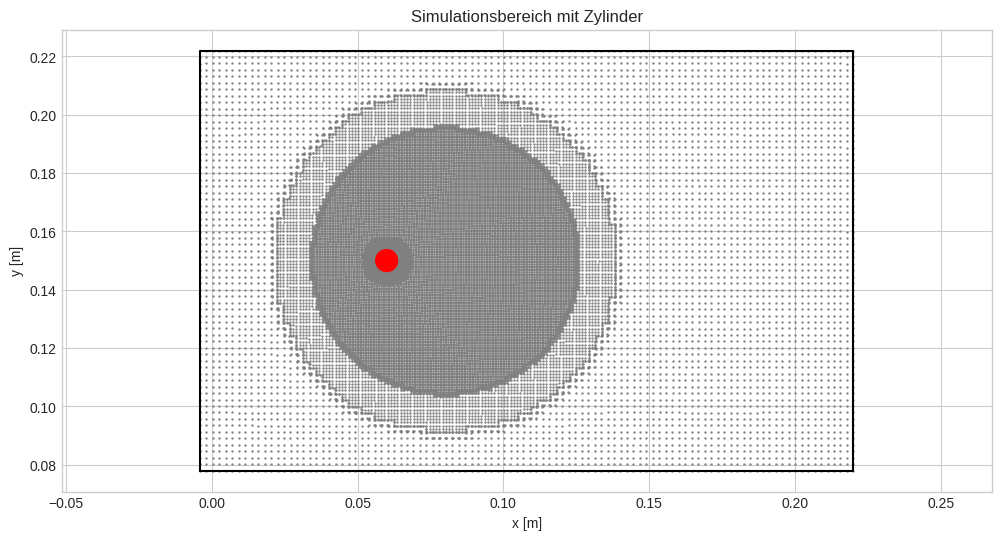

xmin=-0.0040, xmax=0.2200, ymin=0.0780, ymax=0.2220


In [164]:
# Hier eigenen Code schreiben ...

# Minimale und maximale Werte aus den Koordinaten
xmin, xmax = x.min(), x.max()                               # Bereich in x-Richtung
ymin, ymax = y.min(), y.max()                               # Bereich in y-Richtung

# Funktion zum Zeichnen eines Rechtecks mit plot()
def draw_rectangle(x1, x2, y1, y2):
    # 5 Punkte: start -> rechts -> oben -> links -> zurück zum Start
    plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], color='black', lw=1.5)

# --- Visualisierung ---
plt.figure(figsize=(12, 6))

plt.scatter(x, y, s=0.5, color='gray', label='Gitterpunkte')  # alle Punkte in grau

draw_rectangle(xmin, xmax, ymin, ymax)                      # Rechteck um den Simulationsbereich

# Zylinder einzeichnen
c_x, c_y = 0.06, 0.15                                       # Mittelpunkt laut Aufgabenstellung
c_radius = 0.0075 / 2                                       # 7.5mm Durchmesser -> 3.75mm Radius
plt.gca().add_patch(Circle((c_x, c_y), c_radius, color='red', zorder=5))  # rot und über den Punkten

plt.axis('equal')                                           # gleiche Skalierung für x und y
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Simulationsbereich mit Zylinder')

plt.show()

print(f"xmin={xmin:.4f}, xmax={xmax:.4f}, ymin={ymin:.4f}, ymax={ymax:.4f}")

In [165]:
# Hier sind einige Plausibilitätstests:
assert xmax-xmin == 0.224
assert (ymax-ymin)*1.5 < (xmax-xmin)


### 2) Gitter-Visualisierung $\qquad$_(2 Punkte)_

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**2.1) Plotten Sie die Gitterpunkte.** 

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der die Punkte enthält, die von stromauf gesehen _hinter_ dem Zylinder liegen bzw. von diesem verdeckt werden. _("Wie sieht der Schatten aus, wenn das Sonnenlicht von links kommt?")_
  * Wie viele der Punkte liegen in diesem Bereich? Speichern Sie die Anzahl in einer Variable `n_part`.
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

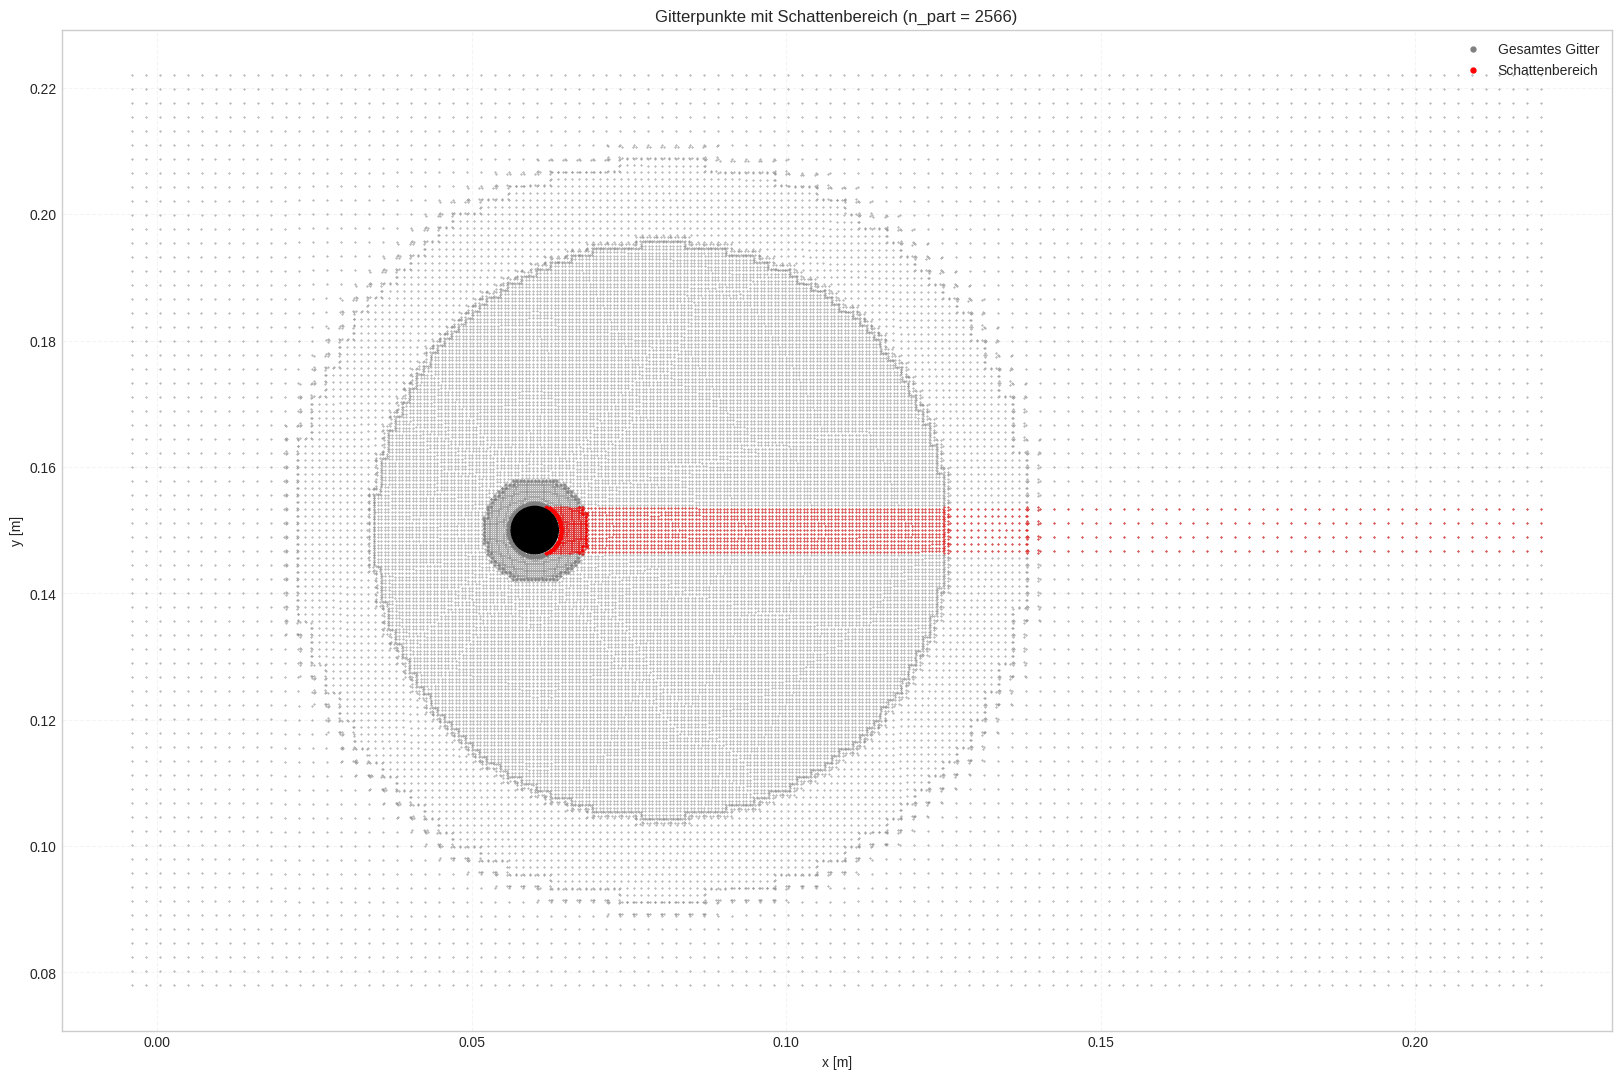

n_part = 2566


In [166]:
# Hier eigenen Code schreiben ...

plt.figure(figsize=(20, 13))                                # 20x13 Zoll wie gefordert

# Zylinderparameter
c_x, c_y = 0.06, 0.15                                       # Mittelpunkt des Zylinders (aus der Aufgabenstellung)
c_radius = 0.0075 / 2                                       # Durchmesser 7.5mm -> Radius 3.75mm (7.5mm / 2 = 3.75mm = 0.00375m)

# Schattenbereich: Punkte die vom Zylinder "verdeckt" werden (Licht von links)
# ACHTUNG: mit >= und <= gab 2568, mit > und < stimmt es (2566)
mask_shadow = (x > c_x) & (y > c_y - c_radius) & (y < c_y + c_radius)  

n_part = np.sum(mask_shadow)                                # Anzahl der True-Werte = Punkte im Schatten
# print("check:", n_part)                                   # Debug, jetzt 2566

# Alle Gitterpunkte in grau plotten
plt.scatter(x, y, s=0.5, marker='.', color='gray', label='Gesamtes Gitter')

# Punkte im Schattenbereich rot hervorheben
plt.scatter(x[mask_shadow], y[mask_shadow], s=0.5, marker='.', color='red', label='Schattenbereich')

# Zylinder einzeichnen
plt.gca().add_patch(Circle((c_x, c_y), c_radius, color='black', zorder=10))  # zorder=10 damit er oben liegt

plt.axis('equal')                                           # sonst wird der Kreis zur Ellipse
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(f'Gitterpunkte mit Schattenbereich (n_part = {n_part})')
plt.legend(markerscale=10, loc='upper right', framealpha=0.9, fontsize=10, edgecolor='gray')
plt.grid(True, alpha=0.2, linestyle='--') 

plt.show()

print(f"n_part = {n_part}")

In [167]:
# Hier ist ein Plausibilitätstest:
assert 500<n_part<5000

**2.2) Erstellen Sie für eine Quantifizierung der örtlichen Auflösung [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der Gitterpunkte.** 

  * Untersuchen Sie die Ortsauflösung entlang $x$, $y$ sowie in Abhängigkeit vom Abstand zur Zylindermitte.
  * Verwenden Sie hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile) und beschriften Sie sie korrekt.
  * Nutzen Sie für die Histogramme je 50 Bins ( = [Klassen](https://de.wikipedia.org/wiki/Histogramm#Einteilung_in_Klassen)) gleichen Umfangs.
  * Wie hoch ist die absolute Häufigkeit (Anzahl der Elemente) für die Bins mit den jeweils meisten Elementen (`n_x_max`, `n_y_max`, `n_r_max`)?


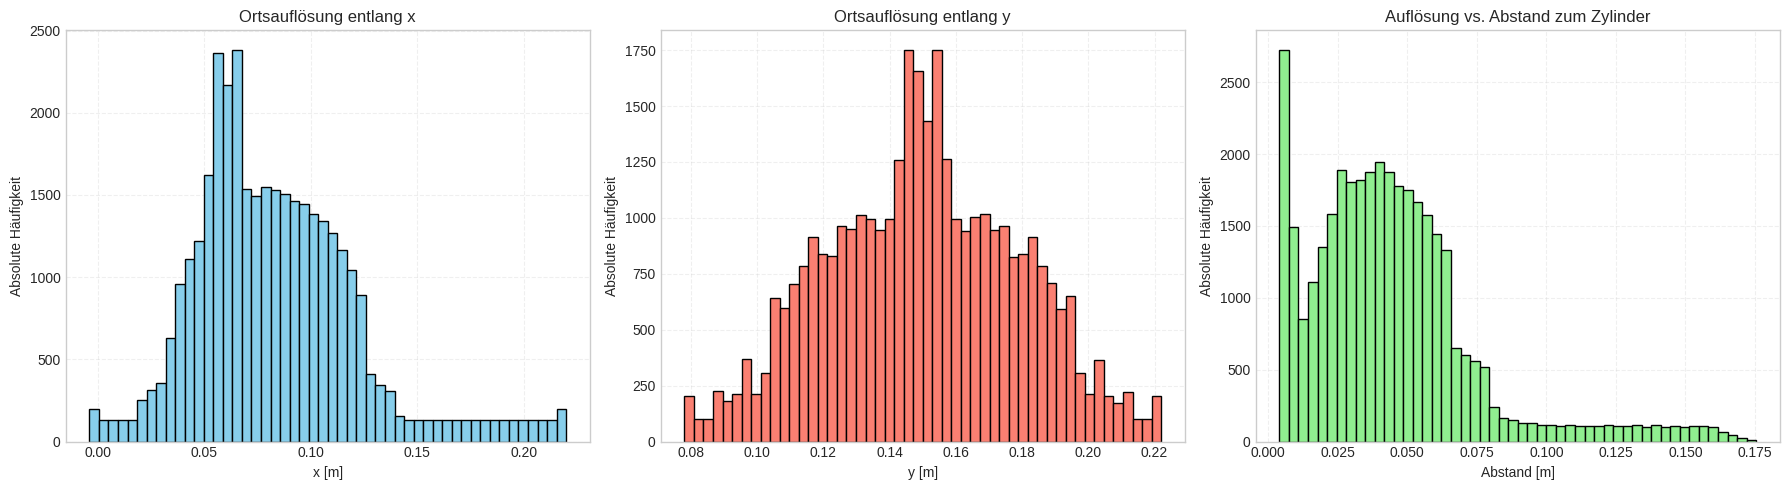

n_x_max = 2382.0, n_y_max = 1751.0, n_r_max = 2725.0


In [168]:
# Hier eigenen Code schreiben ...

# Abstand jedes Punktes zum Zylinderzentrum berechnen
dist_r = np.sqrt((x - 0.06)**2 + (y - 0.15)**2)             # euklidischer Abstand mit Pythagoras

# --- 3 Histogramme nebeneinander ---
plt.figure(figsize=(18, 5))                                 # breit genug für 3 Plots

# Histogram 1: Verteilung der Punkte entlang x
plt.subplot(1, 3, 1)                                        # 1 Zeile, 3 Spalten, Position 1
n_x_vals, bins_x, _ = plt.hist(x, bins=50, color='skyblue', edgecolor='black')  # 50 Bins wie gefordert
plt.title('Ortsauflösung entlang x')
plt.xlabel('x [m]')
plt.ylabel('Absolute Häufigkeit')                           # Anzahl der Punkte pro Bin
plt.grid(True, alpha=0.3, linestyle='--')                   # hilft beim Ablesen

# Histogram 2: Verteilung der Punkte entlang y
plt.subplot(1, 3, 2)                                        # Position 2
n_y_vals, bins_y, _ = plt.hist(y, bins=50, color='salmon', edgecolor='black')
plt.title('Ortsauflösung entlang y')
plt.xlabel('y [m]')
plt.ylabel('Absolute Häufigkeit')
plt.grid(True, alpha=0.3, linestyle='--')                   # hilft beim Ablesen

# Histogram 3: Verteilung nach Abstand zum Zylinder
plt.subplot(1, 3, 3)                                        # Position 3
n_r_vals, bins_r, _ = plt.hist(dist_r, bins=50, color='lightgreen', edgecolor='black')
plt.title('Auflösung vs. Abstand zum Zylinder')
plt.xlabel('Abstand [m]')
plt.ylabel('Absolute Häufigkeit')

plt.grid(True, alpha=0.3, linestyle='--')                   # hilft beim Ablesen

# Maximale Häufigkeit aus jedem Histogram extrahieren
n_x_max = n_x_vals.max()                                    # höchster Balken im x-Histogram
n_y_max = n_y_vals.max()                                    # höchster Balken im y-Histogram
n_r_max = n_r_vals.max()                                    # höchster Balken im r-Histogram

plt.tight_layout()                                          # verhindert Überlappung der Subplots
plt.show()

# Ergebnisse ausgeben
print(f"n_x_max = {n_x_max}, n_y_max = {n_y_max}, n_r_max = {n_r_max}")

In [169]:
# Hier sind einige Plausibilitätstests:
assert 2345 < n_x_max > n_y_max < n_r_max > 2345

## 3) Strömungsgeschwindigkeiten $\qquad$_(2 Punkte)_

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**3.1) Färben Sie Teilbereiche je nach Geschwindigkeit unterschiedlich ein:**

 - Bestimmen Sie die mittlere Geschwindigkeit in y-Richtung (`v_avg`) und in z-Richtung (`w_avg`) sowie die maximalen und minimalen Geschwindigkeiten in x-Richtung `u_max` und `u_min`.
 - Plotten Sie die Punkte des Gitters basierend auf folgenden 4 Kriterien:
      1. Abweichung zur mittleren Strömungsgeschwindigkeit in $y$-Richtung _mindestens_ 2 m/s
      2. Abweichung zur mittleren Strömungsgeschwindigkeit in $z$-Richtung _mindestens_ 4 m/s
      3. weniger als 12 m/s Abweichung zur _Maximal_geschwindigkeit $x$-Richtung
      4. weniger als 24 m/s Abweichung zur _Minimal_geschwindigkeit $x$-Richtung

Betrachten Sie die Kriterien unabhängig voneinander.
Wählen Sie je nach Kriterium eine andere Farbe für die Punkte.
Achten Sie darauf, dass die Achsen [im gleichen Verhältnis skaliert](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html#) sind.

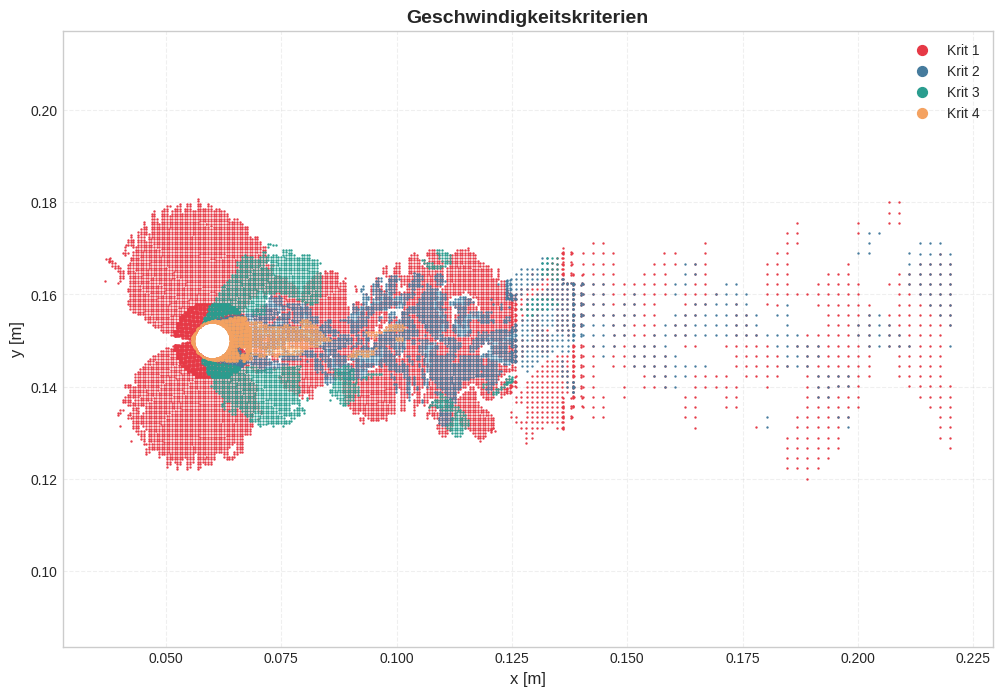

v_avg = -0.09 m/s, w_avg = 0.55 m/s
u_max = 52.56 m/s, u_min = -18.41 m/s


In [170]:
# Hier eigenen Code schreiben ...

# Statistische Kennwerte berechnen
v_avg = np.mean(v)                                          # mittlere Geschwindigkeit in y-Richtung
w_avg = np.mean(w)                                          # mittlere Geschwindigkeit in z-Richtung
u_max = np.max(u)                                           # maximale Geschwindigkeit in x-Richtung
u_min = np.min(u)                                           # minimale Geschwindigkeit in x-Richtung (kann negativ sein!)

# --- 4 Kriterien als logische Masken definieren ---

                                        # Kriterium 1: Abweichung von v_avg mindestens 2 m/s
crit1 = np.abs(v - v_avg) >= 2                              # abs() weil Abweichung positiv oder negativ sein kann

                                        # Kriterium 2: Abweichung von w_avg mindestens 4 m/s
crit2 = np.abs(w - w_avg) >= 4                              # zeigt wo starke 3D-Effekte auftreten

                                        # Kriterium 3: weniger als 12 m/s unter der Maximalgeschwindigkeit
crit3 = (u_max - u) < 12                                    # Punkte mit hoher Geschwindigkeit (nahe u_max)

                                        # Kriterium 4: weniger als 24 m/s über der Minimalgeschwindigkeit
crit4 = (u - u_min) < 24                                    # Punkte mit niedriger Geschwindigkeit (Nachlauf, Stau)

# --- Visualisierung ---
plt.figure(figsize=(12, 8))

# Jedes Kriterium in einer anderen Farbe plotten
# bessere Farben als einfach rot/blau/grün
plt.scatter(x[crit1], y[crit1], s=0.5, color='#e63946', label='Krit 1')
plt.scatter(x[crit2], y[crit2], s=0.5, color='#457b9d', label='Krit 2')
plt.scatter(x[crit3], y[crit3], s=0.5, color='#2a9d8f', label='Krit 3')
plt.scatter(x[crit4], y[crit4], s=0.5, color='#f4a261', label='Krit 4')

plt.axis('equal')                                           # damit der Plot nicht verzerrt ist
plt.xlabel('x [m]', fontsize=12)
plt.ylabel('y [m]', fontsize=12)
#plt.title('Punkte nach Geschwindigkeitskriterien')
plt.title('Geschwindigkeitskriterien', fontsize=14, fontweight='bold') #Punkte nach Geschwindigkeitskriterien
plt.tick_params(axis='both', labelsize=10)
plt.legend(markerscale=10, loc='upper right')               # markerscale=10 macht die Punkte in der Legende größer
plt.grid(True, alpha=0.3, linestyle='--')                   # dezentes Grid
plt.show()


# Kontrolle der Werte
print(f"v_avg = {v_avg:.2f} m/s, w_avg = {w_avg:.2f} m/s")
print(f"u_max = {u_max:.2f} m/s, u_min = {u_min:.2f} m/s")

In [171]:
# Hier sind einige Plausibilitätstests:
assert u_min < 0 < w_avg < 30 < u_max < 60

**3.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.** 

  * Berechnen Sie die Geschwindigkeitsbeträge ([Länge der Geschwindigkeitsvektoren](https://de.wikipedia.org/wiki/Euklidische_Norm)) `u_mag` an den Gitterpunkten.
  * Erzeugen Sie drei Visualisierungen der errechneten Werte:
      1. Mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte (Punktgröße 0.5)
      2. Mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8 Farblevels
      3. Mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte (Punktgröße 0.5). Im Unterschied zur kartesischen Darstellung in Plot 1 soll hier Abstand und [Winkel](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) relativ zur Zylindermitte bestimmt und die Winkelposition auf die x-Achse und der Abstand auf die y-Achse projiziert werden.
    
  * Zeichnen Sie bei Plot 1 und 2 den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

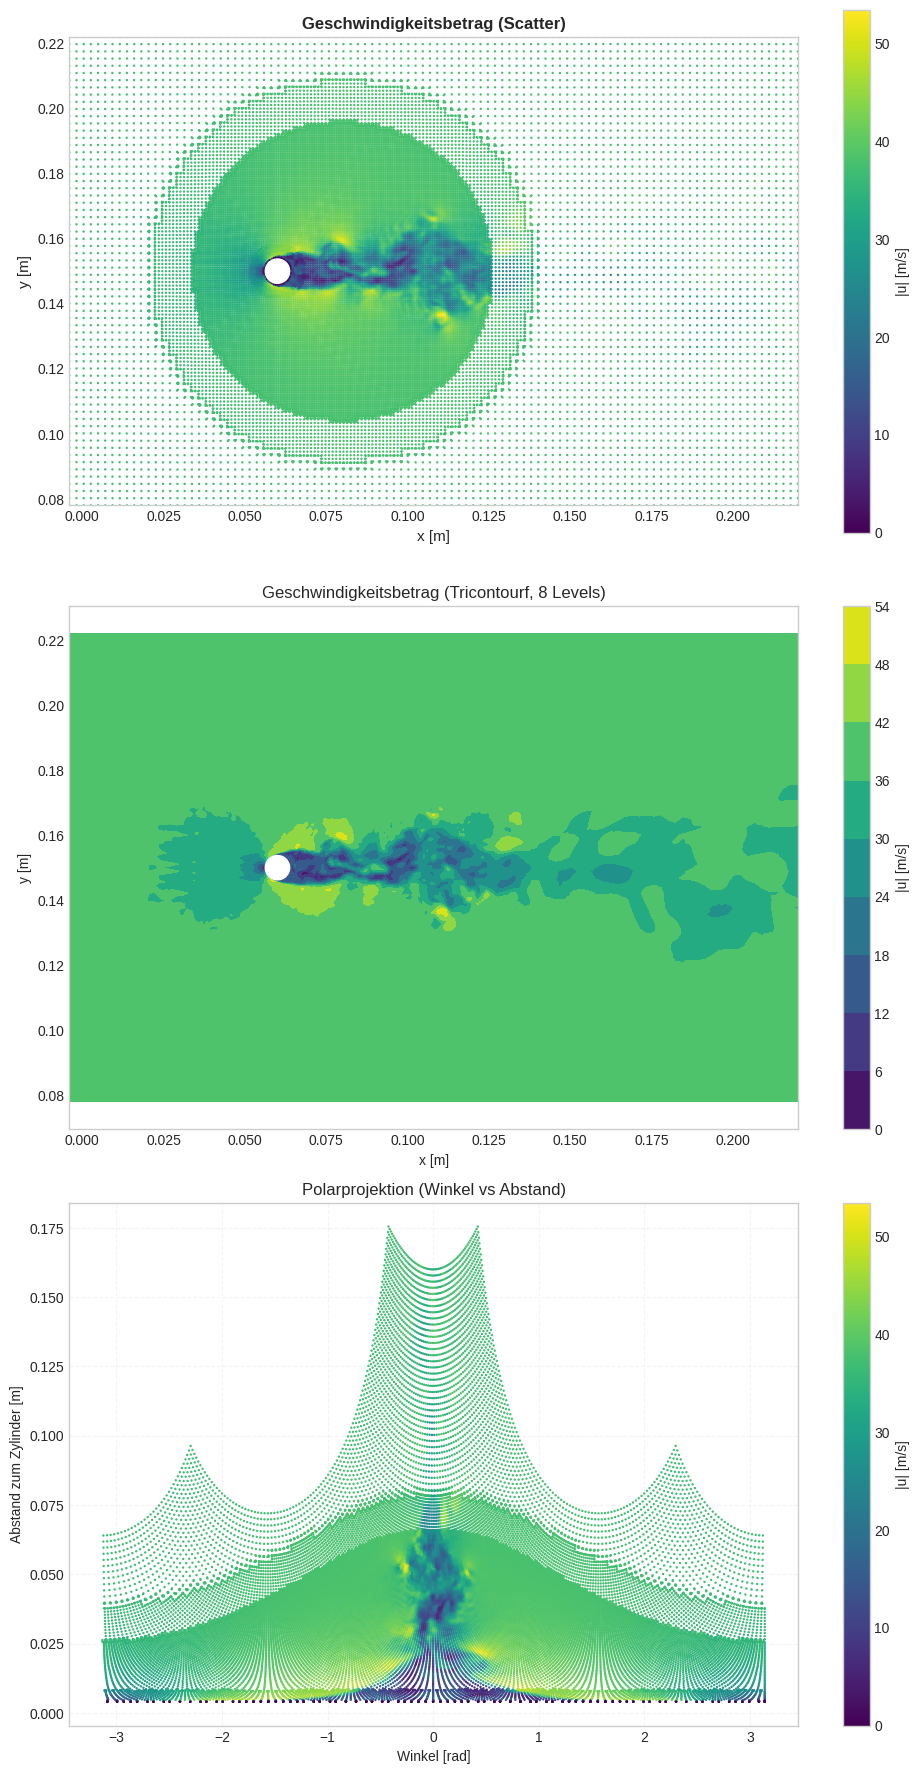

In [172]:
plt.figure(5, (10, 18))
plt.subplot(311)
# Hier eigenen Code schreiben ...

# Berechnung des Geschwindigkeitsbetrags mit Pythagoras in 3D (Übung 2 hatten wir auch)
u_mag = np.sqrt(u**2 + v**2 + w**2)                         # |u| = sqrt(u² + v² + w²), Betrag des Vektors

# Für die Polardarstellung muss ich alles relativ zum Zylinderzentrum rechnen
dx = x - 0.06                                               # Verschiebung in x-Richtung vom Zylindermittelpunkt
dy = y - 0.15                                               # Verschiebung in y-Richtung vom Zylindermittelpunkt

distancia = np.sqrt(dx**2 + dy**2)                          # radialer Abstand r = sqrt(dx² + dy²)
angulo = np.arctan2(dy, dx)                                 # Winkel theta, arctan2 berücksichtigt alle 4 Quadranten

# --- Plot 1: Scatter kartesisch ---
sc1 = plt.scatter(x, y, c=u_mag, s=0.5, cmap='viridis')     # c=u_mag färbt die Punkte nach Geschwindigkeit
plt.gca().add_patch(Circle((0.06, 0.15), 0.00375, color='white', zorder=10))  # weißer Kreis für den Zylinder

                          
cbar1 = plt.colorbar(sc1)
cbar1.set_label('|u| [m/s]', fontsize=10)
cbar1.ax.tick_params(labelsize=10)

plt.xlabel('x [m]', fontsize=11)
plt.ylabel('y [m]', fontsize=11)
                                                # hatte erst plt.axis('equal') aber gab Warning mit xlim/ylim
plt.gca().set_aspect('equal', adjustable='box') # # so funktioniert's ohne Probleme
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title('Geschwindigkeitsbetrag (Scatter)', fontsize=12, fontweight='bold')
plt.grid(False)                               


# --- Plot 2: Tricontourf ---
plt.subplot(312)                                            # zweiter Plot in der Mitte
tc = plt.tricontourf(x, y, u_mag, levels=8, cmap='viridis') # tricontourf interpoliert zwischen unregelmäßigen Punkten
plt.gca().add_patch(Circle((0.06, 0.15), 0.00375, color='white', zorder=10))  # Zylinder wieder einzeichnen
plt.colorbar(tc, label='|u| [m/s]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')
plt.title('Geschwindigkeitsbetrag (Tricontourf, 8 Levels)') # 8 Farbstufen wie gefordert
plt.grid(False)                                # Grid stört bei Konturflächen

# --- Plot 3: Polarprojektion ---
plt.subplot(313)                                            # dritter Plot unten
sc3 = plt.scatter(angulo, distancia, c=u_mag, s=0.5, cmap='viridis')  # x-Achse = Winkel, y-Achse = Abstand
plt.colorbar(sc3, label='|u| [m/s]')
plt.xlabel('Winkel [rad]')                                  # Winkel in Bogenmaß (-π bis π)
plt.ylabel('Abstand zum Zylinder [m]')                      # radialer Abstand in Metern
plt.title('Polarprojektion (Winkel vs Abstand)')            # "abgerollte" Darstellung um den Zylinder
plt.grid(True, alpha=0.2, linestyle='--')      # hier hilft ein sanftes Grid zum Ablesen

plt.tight_layout()                                          # passt Abstände automatisch an
plt.show()

In [173]:
# Hier sind einige Plausibilitätstests:
assert u_mag.shape == u.shape
assert int(u_mag.mean()) == 35

## 4) Regelmäßiges Gitter  $\qquad$_(2 Punkte)_

Daten, die auf einem regelmäßigen Gitter vorliegen, lassen sich häufig vielfältiger verarbeiten und visualisieren.
Um diesen Vorteil ausnutzen zu können, sollen nun die auf einenm unregelmäßgen Gitter vorliegenden Daten auf ein regelmäßiges Gitter projiziert bzw. interpoliert werden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein regelmäßiges Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Verwenden Sie die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) und speichern Sie die Gitterkoordinaten in den Variablen `gx` bzw. `gy`.
  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Berechnen Sie aus diesen Arrays ein Array `inter_u_mag`, das die Geschwindigkeitsbeträge enthält.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie `inter_u_mag` mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
      * Achten Sie auf die korrekte Ausrichtung der Grafik.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

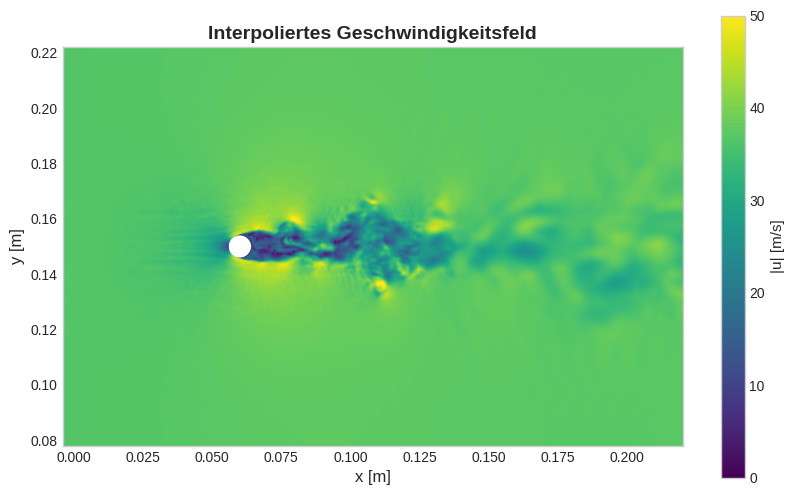

In [174]:
from scipy.interpolate import griddata  # Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"
# Hier eigenen Code schreiben ...

# Schrittweite festlegen (10^-4 m = 0.1 mm wie gefordert)
delta = 1e-4                                                # feine Auflösung für genaue Ableitungen später

# 1D-Arrays für x und y erzeugen
x_range = np.arange(xmin, xmax, delta)                      # von xmin bis xmax in delta-Schritten
y_range = np.arange(ymin, ymax, delta)                      # von ymin bis ymax in delta-Schritten

# 2D-Gitter aus den 1D-Arrays erzeugen
gx, gy = np.meshgrid(x_range, y_range)                      # gx und gy haben jetzt die gleiche Shape (2D)

# Geschwindigkeiten auf das neue Gitter interpolieren
# griddata nimmt die unregelmäßigen Punkte (x,y) und interpoliert auf das regelmäßige Gitter (gx,gy)
inter_u = griddata((x, y), u, (gx, gy), method='cubic')     # cubic für glatte, differenzierbare Ergebnisse
inter_v = griddata((x, y), v, (gx, gy), method='cubic')     # jede Komponente einzeln interpolieren
inter_w = griddata((x, y), w, (gx, gy), method='cubic')

# Geschwindigkeitsbetrag auf dem neuen Gitter berechnen
inter_u_mag = np.sqrt(inter_u**2 + inter_v**2 + inter_w**2) # wieder Pythagoras in 3D

# --- Visualisierung ---
plt.figure(figsize=(10, 6))

# imshow zeigt 2D-Arrays als Bild an
plt.imshow(inter_u_mag, extent=(xmin, xmax, ymin, ymax),    # extent sagt wo die Ränder im Koordinatensystem liegen
           origin='lower',                                   # origin='lower' damit y nach oben wächst
           vmin=0, vmax=50, cmap='viridis')                  # vmax=50 weil u_max ca. 52 war

cbar = plt.colorbar()
cbar.set_label('|u| [m/s]', fontsize=11)
cbar.ax.tick_params(labelsize=10)

plt.gca().add_patch(Circle((0.06, 0.15), 0.00375, color='white'))  # Zylinder einzeichnen

plt.xlabel('x [m]', fontsize=12)
plt.ylabel('y [m]', fontsize=12)

plt.title('Interpoliertes Geschwindigkeitsfeld', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', labelsize=10)
plt.grid(False)  

plt.show()

In [175]:
# Hier sind einige Plausibilitätstests:
assert gx.shape == gy.shape == inter_u_mag.shape
assert len(gx.shape) == 2
assert gx.shape[1]-gx.shape[0] == 800


## 5) Wirbelstärke  $\qquad$_(2 Punkte)_

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}\tag{1}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 

Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} \approx \frac{v_{i,j+1}-v_{i,j}}{\Delta x} \tag{2}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} \approx \frac{u_{i,j}-u_{i+1,j}}{\Delta y}~.\tag{3}
$$

Die Indizes zählen von $i=0\ldots N_\text{Zeilen}-1$ bzw. $j=0\ldots N_\text{Spalten}-1$. Man beachte, dass Gleichung (3) für den Fall formuliert ist, dass ein geringerer Zeilenindex für einen höheren $y$-Wert steht. Sollte das in Ihrer Lösung nicht der Fall sein, sollten Sie für eine korrekte Lösung auch die Formel entsprechend anpassen.

**Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend Gleichung (1). Visualisieren Sie die Wirbelstärken `omega_z` mit _imshow()_.**
  
  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

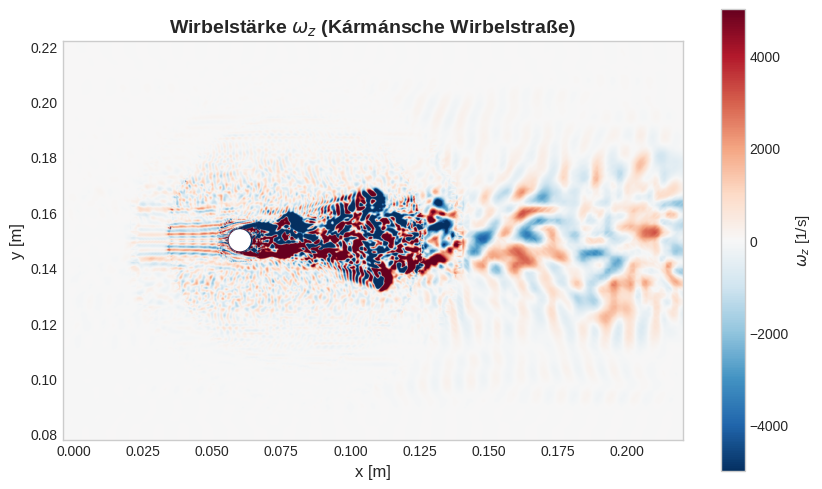

In [176]:
# Hier eigenen Code schreiben ...

# Schrittweite für die Differenzenquotienten (gleich wie beim Gitter)
delta = 1e-4

# --- Berechnung der partiellen Ableitungen ---

# dv/dx nach Gleichung (2): (v[i,j+1] - v[i,j]) / dx
# j ist der Spaltenindex, also in x-Richtung
dv_dx = (inter_v[:, 1:] - inter_v[:, :-1]) / delta          # Differenz zwischen benachbarten Spalten

# du/dy nach Gleichung (3): (u[i,j] - u[i+1,j]) / dy
# ABER: Gleichung (3) nimmt an, dass kleinerer Index = höherer y-Wert
# Bei mir ist es umgekehrt (wegen origin='lower' in imshow):
#   - Zeile 0 entspricht ymin (unten)
#   - Zeile N entspricht ymax (oben)
# Also muss ich die Formel anpassen: (u[i+1,j] - u[i,j]) / dy
du_dy = (inter_u[1:, :] - inter_u[:-1, :]) / delta          # angepasst an meine Zeilenanordnung

# --- Berechnung der Wirbelstärke ---
# omega_z = dv/dx - du/dy nach Gleichung (1)
# Durch die Differenzen verliere ich je eine Zeile/Spalte, also Dimensionen anpassen
omega_z = dv_dx[:-1, :] - du_dy[:, :-1]                     # beide Arrays auf gleiche Größe bringen

# --- Visualisierung ---
plt.figure(figsize=(10, 6))

# imshow mit origin='lower', damit y=0 unten ist (wie im Koordinatensystem)
plt.imshow(omega_z, extent=(xmin, xmax, ymin, ymax), origin='lower',
           cmap='RdBu_r', vmin=-5000, vmax=5000)            # RdBu_r: rot=positiv, blau=negativ, weiß=0

cbar = plt.colorbar()
cbar.set_label(r'$\omega_z$ [1/s]', fontsize=11)             # Einheit: 1/s (Ableitung von m/s nach m)
cbar.ax.tick_params(labelsize=10)

plt.gca().add_patch(Circle((0.06, 0.15), 0.00375, color='white'))  # Zylinder markieren

plt.xlabel('x [m]', fontsize=12)
plt.ylabel('y [m]', fontsize=12)
plt.title(r'Wirbelstärke $\omega_z$ (Kármánsche Wirbelstraße)', fontsize=14, fontweight='bold')  # r'' damit \omega nicht als Escape-Sequenz interpretiert wird
plt.tick_params(axis='both', labelsize=10)
plt.grid(False)                                                 # Grid stört bei imshow

plt.show()

In [177]:
# Hier sind einige Plausibilitätstests:
assert np.abs(np.nanmean(omega_z))<10, 'Einheiten in Ordnung?'
assert 8e5<np.nanmax(omega_z)-np.nanmin(omega_z)<10e5, 'Anordnung der Zeilen korrekt interpretiert?'